In [ ]:
from google.colab import drive
drive.mount("/content/mydrive/")

Mounted at /content/mydrive/


In [ ]:
csv_path = '/content/mydrive/MyDrive/creditcard.csv'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv(csv_path)

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
X = df.drop(['Class'], 1)
y = df['Class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
pca = PCA(n_components=3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [ ]:
X_train.shape

(227845, 3)

In [ ]:
X_test.shape

(56962, 3)

LINEAR REGRESSION

In [ ]:
from sklearn import linear_model, metrics

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
print('Coefficients: ', reg.coef_)
print('Variance score: {}'.format(reg.score(X_test, y_test)))

Coefficients:  [ 0.00012958 -0.00018653 -0.00135775]
Variance score: 0.003227057570362901


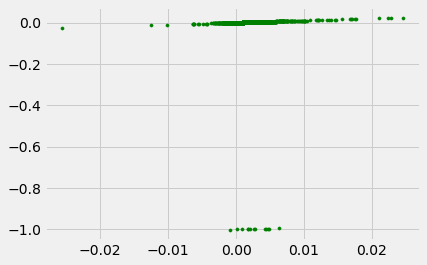

In [ ]:
plt.style.use('fivethirtyeight')
plt.scatter(reg.predict(X_train), reg.predict(X_train) - y_train,
            color = "green", s = 10, label = 'Train data')

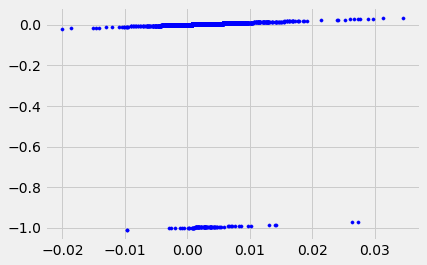

In [ ]:
plt.scatter(reg.predict(X_test), reg.predict(X_test) - y_test,
            color = "blue", s = 10, label = 'Test data')

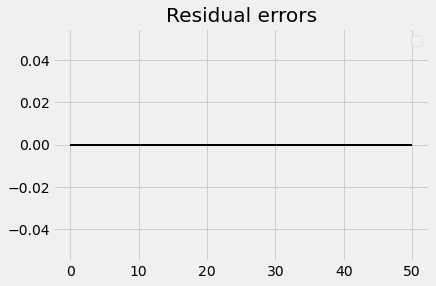

In [ ]:
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
plt.legend(loc = 'upper right')
plt.title("Residual errors")
plt.show()

LOGISTIC REGRESSION


In [ ]:
from sklearn import linear_model
lrModel = linear_model.LogisticRegression(random_state = 23)
lrModel.fit(X_train,y_train)

LogisticRegression(random_state=23)

In [ ]:
lrModel.score(X_test, y_test)

0.9982619992275552

In [ ]:
import seaborn as sns

SUPPORT VECTOR MACHINE (SVM)

In [ ]:
from sklearn.svm import SVC
X_train = X_train[:10000]
y_train = y_train[:10000]
svmModel = SVC()
svmModel.fit(X_train, y_train)

SVC()

In [ ]:
svmModel.score(X_test, y_test)


0.9982619992275552

K NEAREST NEIGHBOUR (KNN) CLASSIFIER

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knnModel = KNeighborsRegressor(n_neighbors=30)
knnModel.fit(X_train, y_train)

NameError: ignored

In [ ]:
knnModel.score(X_test, y_test)

-0.0084867574975378

DECISION TREE

In [ ]:
from sklearn import tree
dtModel = tree.DecisionTreeClassifier(random_state=23)
dtModel.fit(X_train, y_train)
dtModel.score(X_test, y_test)

0.9973139988062217

RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfModel = RandomForestClassifier(n_estimators = 100) 
rfModel.fit(X_train, y_train)
rfModel.score(X_test, y_test)



0.9982619992275552

NAIVE BAYSES


In [ ]:
from sklearn.naive_bayes import GaussianNB
nbModel = GaussianNB()
nbModel.fit(X_train, y_train)
nbModel.score(X_test, y_test)

0.9940135528949124

NEURAL NETWORK


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
model = Sequential()

model.add(Dense(units=3,activation='relu'))
model.add(Dense(units=3,activation='relu'))

model.add(Dense(units=4,activation='relu'))
model.add(Dropout(0.5))


model.add(Dense(units=2,activation='relu'))
model.add(Dense(units=2,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

In [ ]:
X_train.shape

(10000, 3)

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=150,
          validation_data=(X_test, y_test),
          callbacks=[early_stop]
          )

Epoch 1/150
313/313 [==============================] - 3s 10ms/step - loss: 0.0099 - val_loss: 0.0129
Epoch 2/150
313/313 [==============================] - 3s 10ms/step - loss: 0.0099 - val_loss: 0.0129
Epoch 3/150
313/313 [==============================] - 3s 8ms/step - loss: 0.0099 - val_loss: 0.0129
Epoch 4/150
313/313 [==============================] - 3s 10ms/step - loss: 0.0099 - val_loss: 0.0129
Epoch 5/150
313/313 [==============================] - 3s 10ms/step - loss: 0.0099 - val_loss: 0.0129
Epoch 6/150
313/313 [==============================] - 3s 10ms/step - loss: 0.0099 - val_loss: 0.0129
Epoch 7/150
313/313 [==============================] - 3s 10ms/step - loss: 0.0099 - val_loss: 0.0129
Epoch 8/150
313/313 [==============================] - 3s 10ms/step - loss: 0.0099 - val_loss: 0.0129
Epoch 9/150
313/313 [==============================] - 2s 6ms/step - loss: 0.0099 - val_loss: 0.0129
Epoch 10/150
313/313 [==============================] - 3s 10ms/step - loss: 0.0099 

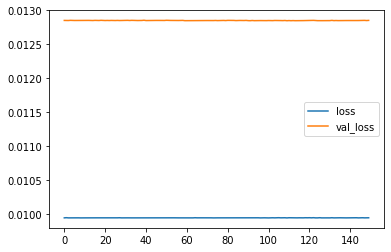

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [ ]:
predictions = model.predict(X_test)

1781/1781 [==============================] - 2s 976us/step


In [ ]:
predictions = predictions > 0.5
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        99

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
print(confusion_matrix(y_test,predictions))

[[56863     0]
 [   99     0]]
